<a href="https://colab.research.google.com/github/KostenK-cloud/My-files-for-IS-4487/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

For this assignment, the variable `answered` is your target.  

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Think about if there are any outliers, missing values, or duplicates.  We will cover those topics next week.  

In [20]:
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/adviseinvest_historical_data.csv'
df = pd.read_csv(url)
df.columns

Index(['answered', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
       'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile',
       'product'],
      dtype='object')

In [21]:
df.dtypes

,0
answered,int64
income,int64
female,object
age,int64
job,int64
num_dependents,int64
rent,int64
own_res,int64
new_car,float64
chk_acct,int64


In [22]:
df.describe
df.isnull().sum()

,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


# Step 2: Begin to Explore the Data

We will learn more about Exploratory Data Analysis (EDA) in Week 5. The following steps are to help you connect the data visualization steps that we practiced last week with the process of data understanding - learning more about the dataset and finding the data quality issues that need to be addressed.   These are the first steps in EDA.

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

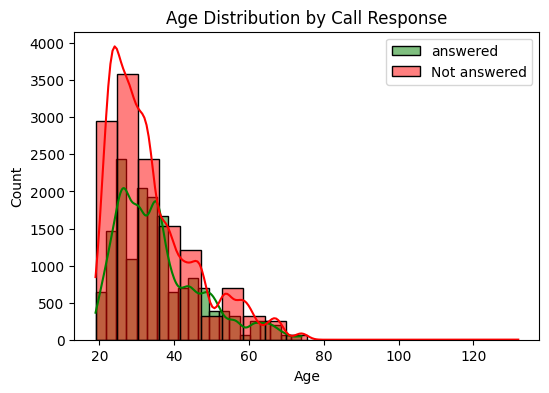

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['answered'] == 1]['age'], bins=20, color='green', label='answered', kde=True)
sns.histplot(df[df['answered'] == 0]['age'], bins=20, color='red', label='Not answered', kde=True)
plt.legend()
plt.title('Age Distribution by Call Response')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


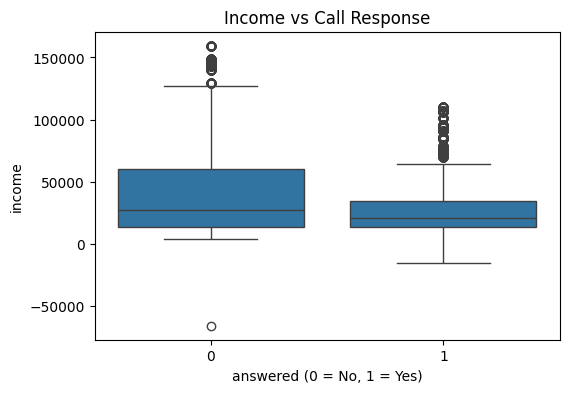

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x = 'answered', y='income', data=df)
plt.title('Income vs Call Response')
plt.xlabel('answered (0 = No, 1 = Yes)')
plt.ylabel('income')
plt.show()

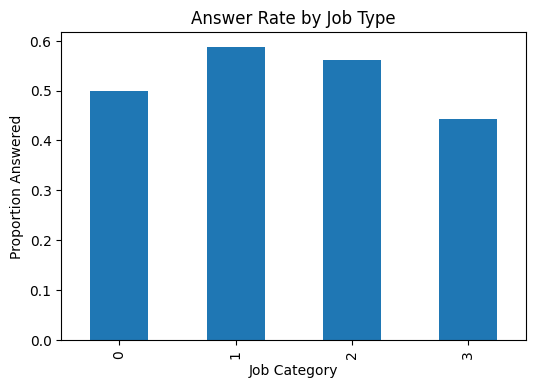

In [25]:
job_answered = df.groupby('job')['answered'].mean()

job_answered.plot(kind='bar', figsize=(6,4))
plt.title('Answer Rate by Job Type')
plt.xlabel('Job Category')
plt.ylabel('Proportion Answered')
plt.show()

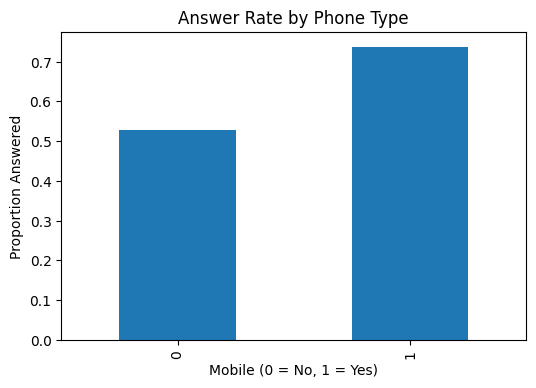

In [26]:
mobile_answered = df.groupby('mobile')['answered'].mean()

mobile_answered.plot(kind='bar', figsize=(6,4))
plt.title('Answer Rate by Phone Type')
plt.xlabel('Mobile (0 = No, 1 = Yes)')
plt.ylabel('Proportion Answered')
plt.show()

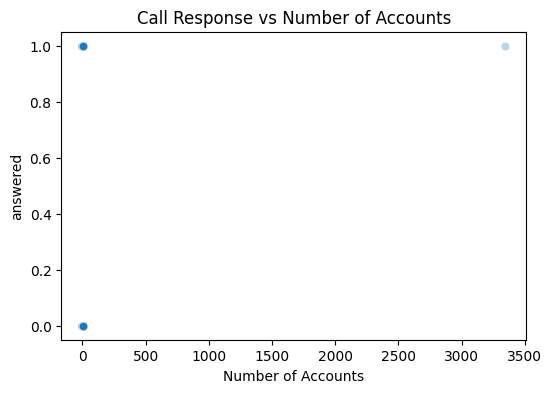

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='num_accts', y='answered', data=df, alpha=0.3)
plt.title('Call Response vs Number of Accounts')
plt.xlabel('Number of Accounts')
plt.ylabel('answered')
plt.show()

# Step 3: Summarize Your Findings
Question 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

### ✍️ Your Response: 🔧
3.1. When predicting whether a consumer will answer a scheduled call, not all factors are equally helpful. The target variable, Answered, seems to be significantly correlated with factors that may affect availability or the chance of responding, such as age, income, job category, mobile phone usage, and number of accounts. Since variables like Product are only detected after a call is answered, they are useless for this business challenge. In subsequent phases of modeling, certain demographic factors may be eliminated if they have little or no link with the aim.

Question 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

### ✍️ Your Response: 🔧
3.2.Missing values and possible outliers could be fixed in the dataset, especially for numerical variables like age and income. Clearer encoding or level consolidation may be advantageous for some category variables. Furthermore, adding time-based factors like the day of the week or the time of the call could enhance the model's capacity to forecast call answer rates and more directly address staffing inefficiencies.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [28]:
!jupyter nbconvert --to html "assignment_04_data_understanding.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_04_data_understanding.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye